<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [73]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer


In [75]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [13]:
df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [15]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [17]:
df.tail

<bound method NDFrame.tail of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [19]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [7]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [85]:
df = df.drop(columns=['Unnamed: 32'])

In [87]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [89]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print(df['diagnosis'].value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64


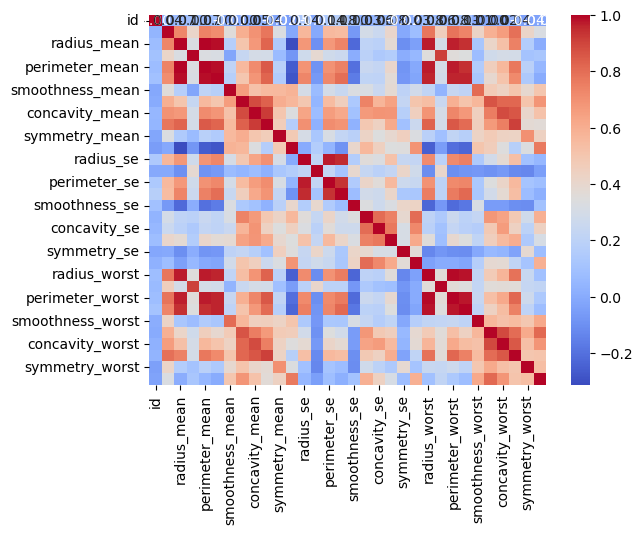

In [91]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis.

In [33]:
# ANSWER
df_subset = df.drop(columns=['diagnosis'])
# Initialize the MinMaxScaler
scaler = MinMaxScaler()


In [35]:
# Normalize the data
df_normalized = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)


In [37]:
print(df_normalized.head())

         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  0.000915     0.521037      0.022658        0.545989   0.363733   
1  0.000915     0.643144      0.272574        0.615783   0.501591   
2  0.092495     0.601496      0.390260        0.595743   0.449417   
3  0.092547     0.210090      0.360839        0.233501   0.102906   
4  0.092559     0.629893      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       0.686364  ...      0.620776       0.141525 

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [41]:
# ANSWER
corr_matrix = df_normalized.corr()
print(corr_matrix)

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [43]:
# ANSWER
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)


In [45]:
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [1.32880574e+01 5.69680537e+00 2.83539505e+00 1.98135718e+00
 1.64881531e+00 1.23467271e+00 9.78273239e-01 6.71752969e-01
 4.60792428e-01 4.03133096e-01 3.49154976e-01 2.93890434e-01
 2.61146925e-01 2.41330214e-01 1.56973649e-01 9.41285258e-02
 7.98099486e-02 5.90462723e-02 5.25911946e-02 4.91219277e-02
 3.10707842e-02 2.99412056e-02 2.74305238e-02 2.42490222e-02
 1.80393609e-02 1.54797297e-02 8.17169884e-03 6.89810286e-03
 1.33040206e-04 7.48376054e-04 1.58933755e-03]

Eigenvectors:
 [[-2.29121629e-02 -3.40684907e-02 -9.69384357e-02 -2.65980453e-02
  -1.13275871e-02 -3.16733438e-01 -9.07115632e-01  9.63624150e-02
   1.49115642e-01  1.69267515e-01 -5.81889971e-02 -6.72125159e-03
   4.84108383e-03 -6.50009912e-03 -6.88594292e-03  2.75349185e-03
  -7.77998301e-03  1.97073716e-02 -5.44224782e-03 -2.04549082e-02
  -9.87091673e-03  6.19570677e-03  3.19033693e-03 -1.02890273e-02
  -4.23338835e-03 -1.32609967e-03 -2.57132397e-03  1.62387479e-03
  -7.12258084e-05 -6.85226337e-04 

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues.

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [47]:
eigenvalues, _ = np.linalg.eig(corr_matrix)

In [69]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Cumulative Explained Variance from Eigenvalues
    
    Parameters:
    eig_vals (array-like): Array or list of eigenvalues
    
    Returns:
    numpy.ndarray: Cumulative explained variance
    '''
    eig_vals = np.array(eig_vals)
    explained_variance = eig_vals / np.sum(eig_vals)
    cumulative_explained_variance = np.cumsum(explained_variance)
    return cumulative_explained_variance


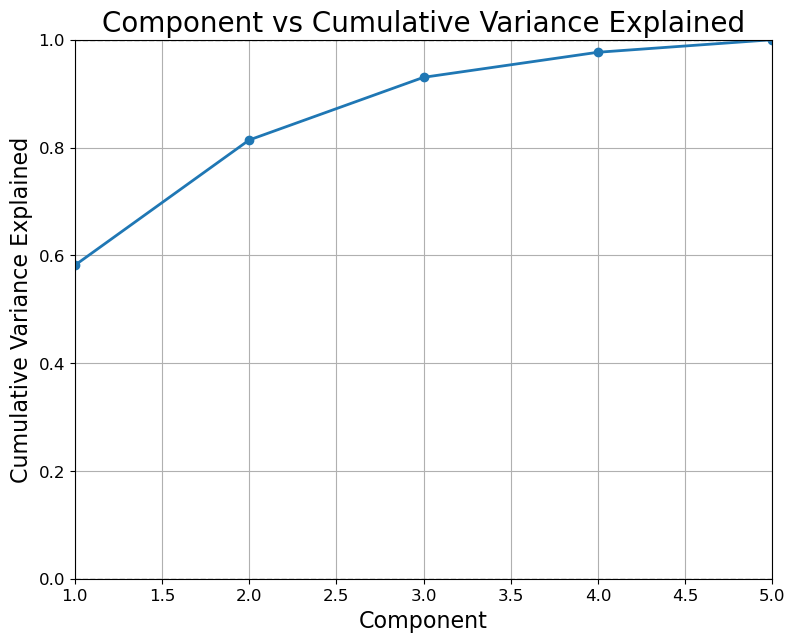

In [71]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Cumulative Explained Variance from Eigenvalues
    
    Parameters:
    eig_vals (array-like): Array or list of eigenvalues
    
    Returns:
    numpy.ndarray: Cumulative explained variance
    '''
    eig_vals = np.array(eig_vals)
    explained_variance = eig_vals / np.sum(eig_vals)
    cumulative_explained_variance = np.cumsum(explained_variance)
    return cumulative_explained_variance

def plot_var_exp(eig_vals):
    '''
    Plot Cumulative Explained Variance vs Principal Components
    
    Parameters:
    eig_vals (array-like): Array or list of eigenvalues
    '''
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9, 7))

    component_number = np.arange(1, len(cum_var_exp) + 1)  # Use NumPy for range

    plt.plot(component_number, cum_var_exp, lw=2, marker='o')  # Add markers for clarity

    plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
    plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')  # Changed from 100 to 1 for normalized data

    ax = plt.gca()
    ax.set_xlim([1, len(cum_var_exp)])  # Adjust x-axis limit to fit the number of components
    ax.set_ylim([0, 1])  # Adjust y-axis limit for normalized data

    ax.set_ylabel('Cumulative Variance Explained', fontsize=16)
    ax.set_xlabel('Component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    ax.set_title('Component vs Cumulative Variance Explained', fontsize=20)

    plt.grid(True)  # Optional: Add grid for better readability
    plt.show()

# Example usage:
eigenvalues = np.array([2.5, 1.0, 0.5, 0.2, 0.1])  
plot_var_exp(eigenvalues)

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [93]:
X = df.drop(columns=['id', 'diagnosis'])  # Drop 'id' and 'diagnosis' columns
y = df['diagnosis']


In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
# ANSWER
# Create an instance of PCA
pca = PCA()

# Fit Xs
pca.fit(X_scaled)

PCA()

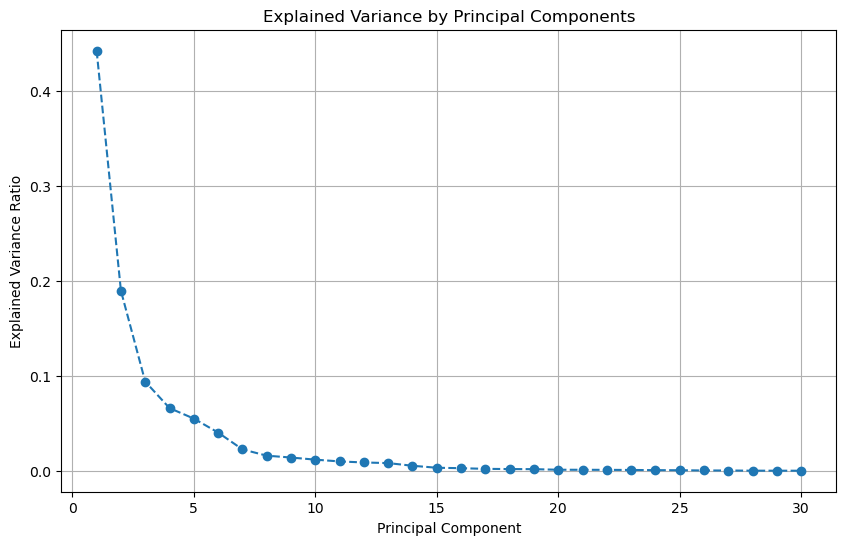

In [101]:
# ANSWER
# Plot explained_variance_
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [111]:
# ANSWER
# Apply dimensionality reduction to Xs using transform
n_components = 4
# Create PCA instance with the desired number of components
pca = PCA(n_components=n_components)

In [113]:
X_pca = pca.fit_transform(X_scaled)

In [115]:
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['diagnosis'] = y  


C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

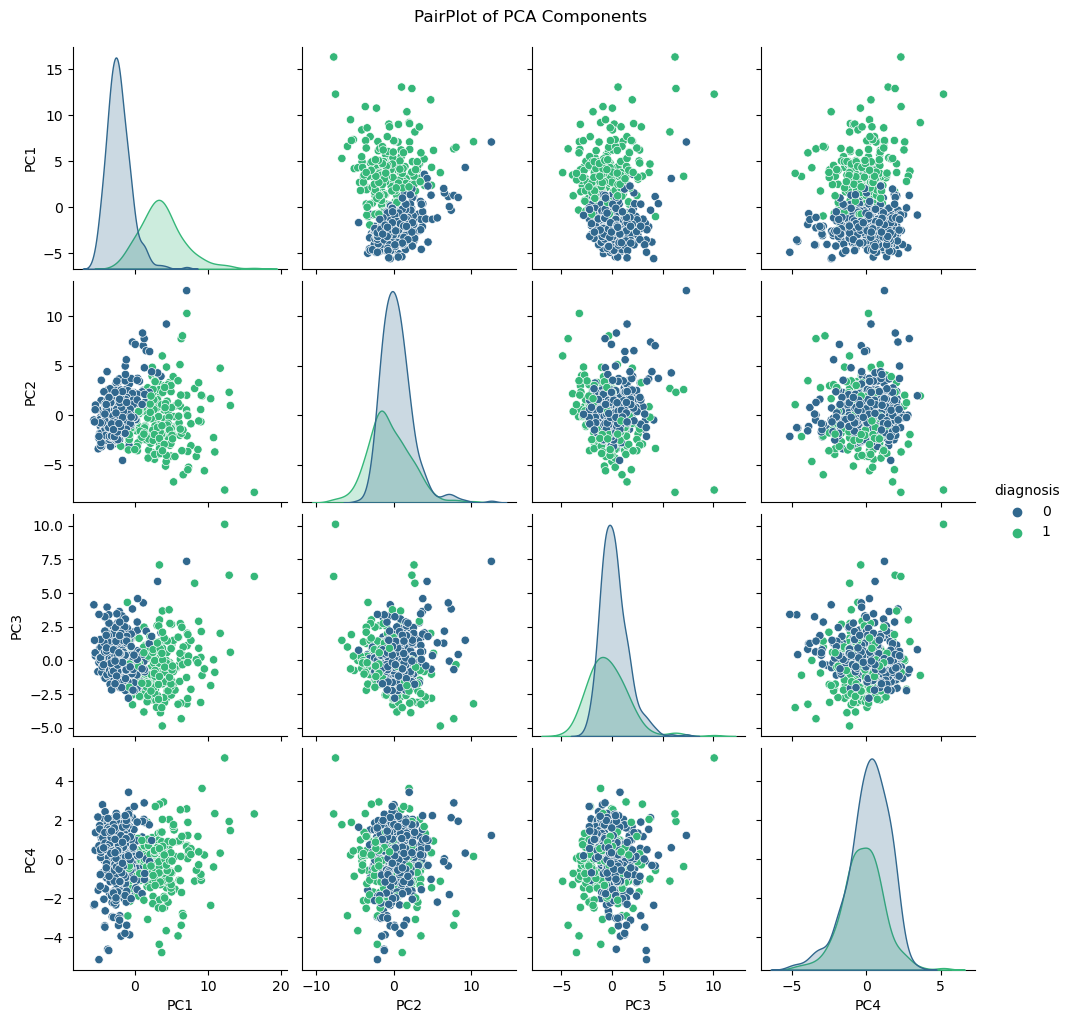

In [117]:
# ANSWER
# Create PairPlot of PCA
sns.pairplot(pca_df, hue='diagnosis', palette='viridis', diag_kind='kde')
plt.suptitle('PairPlot of PCA Components', y=1.02)
plt.show()

### 7. Split Data to 80/20 and use PCA prior to a supervised learning task

In this section we use PCA as a preprocessing step to a supervised learning algorithm.

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Split the original dataset 80/20. Then apply standard scaler followed by PCA.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaler to X_train and X_test (fit_transform on X_train, transform on X_test):
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the PCA class and set at 16 components
pca = PCA(n_components=16)

# Apply PCA to the standardised features
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)


In [123]:
print("Shape of X_train_scaled_pca:", X_train_scaled_pca.shape)
print("Shape of X_test_scaled_pca:", X_test_scaled_pca.shape)

Shape of X_train_scaled_pca: (455, 16)
Shape of X_test_scaled_pca: (114, 16)


Apply a KNN algorithm on `X_train_scaled` and `X_train_scaled_pca` with 5 neighbours, then evaluate using `X_test_scaled` and `X_test_scaled_pca`. Has performance been impacted as a result of dimension reduction?

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [127]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Test accuracy of KNN using standardised data
y_pred = knn.predict(X_test_scaled)


In [129]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of KNN classifier on standardized data: {accuracy:.4f}")

Accuracy of KNN classifier on standardized data: 0.9474


In [131]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled_pca
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_scaled_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_scaled_pca)

# Test accuracy of KNN using standardised PCA-transformed data
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy of KNN classifier on PCA-transformed data: {accuracy_pca:.4f}")

Accuracy of KNN classifier on PCA-transformed data: 0.9561


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



